#### Perform Cost Benefit Analysis

In [3]:
import pandas as pd
import pickle
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cross_validation import cross_val_score
import statsmodels.api as sm
%matplotlib inline

/Users/jennifer/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jennifer/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [13]:
import pickle
with open ('/Users/jennifer/Desktop/Phan_Metis/Project 3/Pickle Data/df_all1_dummies.pkl','rb') as picklefile:
    df_all1 = pickle.load(picklefile)

In [14]:
y = df_all1[['certified']]
# X
X = df_all1[df_all1.columns[0:-1]]

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.5, stratify=y)

In [16]:
log_model2 = LogisticRegression(class_weight='balanced',C=.1,penalty='l1')

In [17]:
log_model2.fit(X_train,np.ravel(y_train))
p = log_model2.predict_proba(X_test)[:,1]

(p > 0.2) * 1

array([1, 1, 0, ..., 1, 1, 1])

In [46]:
# cost = np.array([[3800.0, -4500.0], [-2000.0, 0]])
# cost =  np.array([[0, -4500.0], [-8000.0, 3800.0]])
cost = np.array([[0, -4500], [-4000, 3000]])

In [42]:
confusion_matrix(y_test,(p>.6)*1)

array([[  36825,   10348],
       [ 305636, 1103505]])

In [40]:
cost * confusion_matrix(y_test,(p > .2) * 1)

array([[  0.00000000e+00,  -1.07635500e+08],
       [ -2.62688000e+08,   5.22995900e+09]])

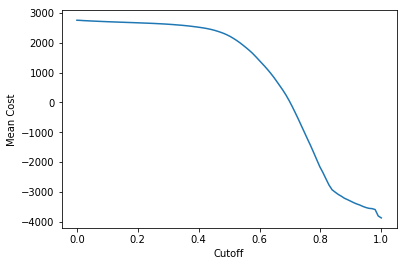

In [48]:
n = len(p)
def cutoff_cost(p0):
    conf = confusion_matrix(y_test, (p>p0)*1)
    return np.sum(cost*conf)/n

cut = np.linspace(0,1,100)
costs = list(map(cutoff_cost, cut))
plt.plot(cut,costs)
plt.xlabel("Cutoff")
plt.ylabel("Mean Cost");

In [45]:
cut[np.argmin(costs)]

0.0